
<h1 style="text-align: center">UC Berkeley // Machine Learning and Artificial Intelligence</h1>
<h2 style="text-align: center;">Capstone Project</h2>
<h3 style="text-align: center; border: 2px dashed; padding: 25px 25px; color: blue; font-weight: bold; font-style: italic;">Is My Airline Flight Likely to be Cancelled or Diverted?</br></br><span style="text-align: center; color:black; font-size:16px; font-weight: normal; font-style: normal; ">(A Classification Problem)</br></br><strong>Student:</strong> Ameet Doshi</br><strong>Facilitator:</strong> Dr. Matilde D'Amelio</span></h3>

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">1.0 Business Understanding</h2>
    
### 1.1 Introduction
Flight delays, cancellations or diversions experienced by airline travellers are can both emotionally and physically impact the enjoyment of the planned journey, as well as create negative sentiment for the airline. 

There are a number of factors that may result in a flight being delayed, cancelled or diverted (generally, a "flight change"), including issues stemming from:
* The airline carrier
* Aircraft issues (e.g. requiring engineering resolution)
* Weather along the flight path
* The originating or destination airports (security, congestion)
* Personnel issues (e.g. staff shortage, out of flight time)

### 1.2 Business Goals and KPIs
As an airline traveller/customer, could we benefit from a deeper understanding of what conditions may cause a flight change, such that we may try to avoid those conditions when booking or rescheduling a flight?
1. Improve traveller satisfaction, and therefore airline brand sentiment, by indicating to a flight customer when a flight change may be more probable.
2. ............need more here.........


### 1.3 Data Mining Questions and Goals
1. Understand if there are any correlations between the airline carrier, individual plane, or airport to an unexpected flight change.
2. Understand if certain days of the week or month have higher propensity for flight changes.
3. Understand if flight duration plays a role in propensity for flight changes.
4. Test different classification models, measuring each's score and loss function to suggest which may be the best to classify and predict future flight changes.

### 1.4 Sourcing the Data
As [summarized by Data Society](https://data.world/data-society/airlines-delay), the U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics (BTS) tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled and diverted flights appears in DOT's monthly [Air Travel Consumer Report](https://www.transportation.gov/individuals/aviation-consumer-protection/air-travel-consumer-reports), published about 30 days after the month's end, as well as in summary tables posted on this website. BTS began collecting details on the causes of flight delays in June 2003. Summary statistics and raw data are made available to the public at the time the Air Travel Consumer Report is released.

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">2.0 Data Understanding</h2>

### 2.1 Gathering the Data
The full dataset consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. 
* The data comes originally from [RITA](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=FGJ) where it is described in detail (not all features are retained from original dataset)
* For purposes of this capstone project, datasets were downloaded from the Harvard Dataverse: [Data Expo 2009: Airline on time data](https://doi.org/10.7910/DVN/HG7NV7)
* A subset of the available dataset will be used for performance and manageability considerations (for 2008), which contains approximately 2.4MM records with 29 features. 

### 2.2 Feature (column) Descriptions
| Feature           | Values | Comments |
| :---------------- | :------ | :----: |
| Year       |   1987-2008   | _for full dataset, a subset is used for performance_ |
| Month       |   1-12   |  |
| DayofMonth       |   1-31   |  |
| DayOfWeek       |   1 (Monday) - 7 (Sunday)   |  |
| DepTime       |   actual departure time (local, hhm m)   |  |
| CRSDepTime       |   scheduled departure time (local, hhmm)   |  |
| ArrTime       |   actual arrival time (local, hhmm)   |  |
| CRSArrTime       |   scheduled arrival time (local, hhmm)   |  |
| UniqueCarrier       |   unique carrier code   |  |
| FlightNum       |   flight number   |  |
| TailNum       |   plane tail number   |  |
| ActualElapsedTime       |   in minutes   |  |
| CRSElapsedTime       |   in minutes   |  |
| AirTime       |   in minutes   |  |
| ArrDelay       |   arrival delay, in minutes   |  |
| DepDelay       |   departure delay, in minutes   |  |
| Origin       |   origin IATA airport code   |  |
| Dest       |   destination IATA airport code   |  |
| Distance       |   in miles   |  |
| TaxiIn       |   taxi in time, in minutes   |  |
| TaxiOut       |   taxi out time, in minutes   |  |
| Cancelled       |   was the flight cancelled?   |  |
| CancellationCode       |   reason for cancellation    | (A = carrier, B = weather, C = NAS, D = security) |
| Diverted       |   1 = yes, 0 = no   |  |
| CarrierDelay       |   in minutes   |  |
| WeatherDelay       |   in minutes   |  |
| NASDelay       |   in minutes   |  |
| SecurityDelay       |   in minutes   |  |
| LateAircraftDelay       |   in minutes   |  |

### 2.3 Prepare the Environment and Notebook
* Import relevant packages and modules, and set any needed configurations 
* Load the data
* Sanitize and optimize the dataframe as needed (for data exploration and pre-processing)

#### 2.3.1 Import Packages

In [1]:
import time
import pickle
import warnings
import os

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import RocCurveDisplay

from sklearn import set_config

#### 2.3.2 Environment Configurations

In [2]:
# Default plot figure sizes
plt.rcParams["figure.figsize"] = (16, 5)

# Pipeline configuration visualization
set_config(display="diagram")

# Silence any warnings
#warnings.filterwarnings("ignore")

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# see all columns
pd.options.display.max_columns = 50

#### 2.3.3 Load Data
***Note:*** _For performance and manageability considerations, only using 2008 dataset, though a later test may use 2007 dataset as a validation set_

In [3]:
# There are numerous years of data available on the Harvard 
df = pd.read_csv("data/dataset-harvard-delayed-flights-2008.csv.bz2", compression="bz2", sep=",")
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0000,1325,1451.0000,1435,WN,588,N240WN,68.0000,70.0000,55.0000,16.0000,18.0000,HOU,LIT,393,4.0000,9.0000,0,NaN,0,16.0000,0.0000,0.0000,0.0000,0.0000
1,2008,1,3,4,1125.0000,1120,1247.0000,1245,WN,1343,N523SW,82.0000,85.0000,71.0000,2.0000,5.0000,HOU,MAF,441,3.0000,8.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0000,2015,2136.0000,2140,WN,3841,N280WN,87.0000,85.0000,71.0000,-4.0000,-6.0000,HOU,MAF,441,2.0000,14.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0000,855,1203.0000,1205,WN,3,N308SA,120.0000,130.0000,108.0000,-2.0000,8.0000,HOU,MCO,848,5.0000,7.0000,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0000,1400,1726.0000,1710,WN,25,N462WN,123.0000,130.0000,107.0000,16.0000,23.0000,HOU,MCO,848,6.0000,10.0000,0,NaN,0,16.0000,0.0000,0.0000,0.0000,0.0000


#### 2.3.4 Sanitize and optimize dataframe
These updates to the dataframe column names and data types will aide efficiency in later preparation and modeling steps.

##### 2.3.4.1 Sanitize column names

In [4]:
# sanitize and standardize column names for ease of reference
df.columns = df.columns.str.lower()
df.columns = df.columns.str.strip()
df.columns = df.columns.str.replace(" ", "_")
df.head(1)

,year,month,dayofmonth,dayofweek,deptime,crsdeptime,arrtime,crsarrtime,uniquecarrier,flightnum,tailnum,actualelapsedtime,crselapsedtime,airtime,arrdelay,depdelay,origin,dest,distance,taxiin,taxiout,cancelled,cancellationcode,diverted,carrierdelay,weatherdelay,nasdelay,securitydelay,lateaircraftdelay
0,2008,1,3,4,1343.0000,1325,1451.0000,1435,WN,588,N240WN,68.0000,70.0000,55.0000,16.0000,18.0000,HOU,LIT,393,4.0000,9.0000,0,NaN,0,16.0000,0.0000,0.0000,0.0000,0.0000


##### 2.3.4.2 Optimize dataframe data types for memory/performance

Use the `dtype-diet` package to evaluate the initial data types for each dataframe feature, and recommend more memory and disk efficient data type casting to improve runtime performance. 

In [5]:
!pip install dtype-diet

Defaulting to user installation because normal site-packages is not writeable


In [6]:
from dtype_diet import report_on_dataframe

'''
Use `report_on_dataframe()` method to evaluate the values for each column
and recommend a dtype that still quantifies the value set, while reducing memory usage.
'''
df_dtype_analyze = report_on_dataframe(df)
df_dtype_analyze

,Current dtype,Proposed dtype,Current Memory (MB),Proposed Memory (MB),Ram Usage Improvement (MB),Ram Usage Improvement (%)
Column,,,,,,
year,int64,int16,9332.9414,2333.2822,6999.6592,74.9995
month,int64,int8,9332.9414,1166.6724,8166.2690,87.4994
dayofmonth,int64,int8,9332.9414,1166.6724,8166.2690,87.4994
dayofweek,int64,int8,9332.9414,1166.6724,8166.2690,87.4994
deptime,float64,float32,9332.9414,4666.5020,4666.4395,49.9997
crsdeptime,int64,int16,9332.9414,2333.2822,6999.6592,74.9995
arrtime,float64,float32,9332.9414,4666.5020,4666.4395,49.9997
crsarrtime,int64,int16,9332.9414,2333.2822,6999.6592,74.9995
uniquecarrier,object,category,68830.0444,1167.5200,67662.5244,98.3038


In [7]:
'''
Using the dtype_diet.optimize_dataframe() seems to change some values
simply by applying it's recommended dtypes to the dataframe. 

Taking a snapshot of the memory for the dataframe object before and after to
indicate memory savings
'''
# convert the proposed dtypes per column into a dictionary
dict_dtypes_opt = df_dtype_analyze["Proposed dtype"].to_dict()

# get initial memory 
initial_memory = df.memory_usage(deep=True).sum()

# update dtypes, saving to a new dataframe
df_opt = df.astype(dict_dtypes_opt)

# determin how much memory was saved
final_memory = df_opt.memory_usage(deep=True).sum()
memory_savings = (initial_memory - final_memory) / initial_memory * 100

print(f"Memory usage before: {initial_memory/(1024**2)} bytes")
print(f"Memory usage after: {final_memory/(1024**2)} bytes")
print(f"Memory savings: {memory_savings:.2f}%")

Memory usage before: 1062.1283693313599 bytes
Memory usage after: 134.91320610046387 bytes
Memory savings: 87.30%


---

***💡 Insights:***
* Memory allocation was reduced by **87.3%** for the same dataset, simply by optimizing data types!
* This exercise can significantly improve modeling performance with larger datasets, at scale.

---

##### 2.3.4.3 Review the new Dataframe
* confirm sanitized column names
* confirm optimized data types (and reduced memory footprint; no data was lost in this process)

In [8]:
df_opt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389217 entries, 0 to 2389216
Data columns (total 29 columns):
 #   Column             Dtype   
---  ------             -----   
 0   year               int16   
 1   month              int8    
 2   dayofmonth         int8    
 3   dayofweek          int8    
 4   deptime            float32 
 5   crsdeptime         int16   
 6   arrtime            float32 
 7   crsarrtime         int16   
 8   uniquecarrier      category
 9   flightnum          int16   
 10  tailnum            category
 11  actualelapsedtime  float16 
 12  crselapsedtime     float16 
 13  airtime            float16 
 14  arrdelay           float32 
 15  depdelay           float32 
 16  origin             category
 17  dest               category
 18  distance           int16   
 19  taxiin             float16 
 20  taxiout            float16 
 21  cancelled          int8    
 22  cancellationcode   category
 23  diverted           int8    
 24  carrierdelay       float

### 2.4 Explore the Data (EDA)
* Data integrity review
* Univariate analysis
* Bivariate analysis
* Observations and conclusions

#### 2.4.1 Data Integrity Review

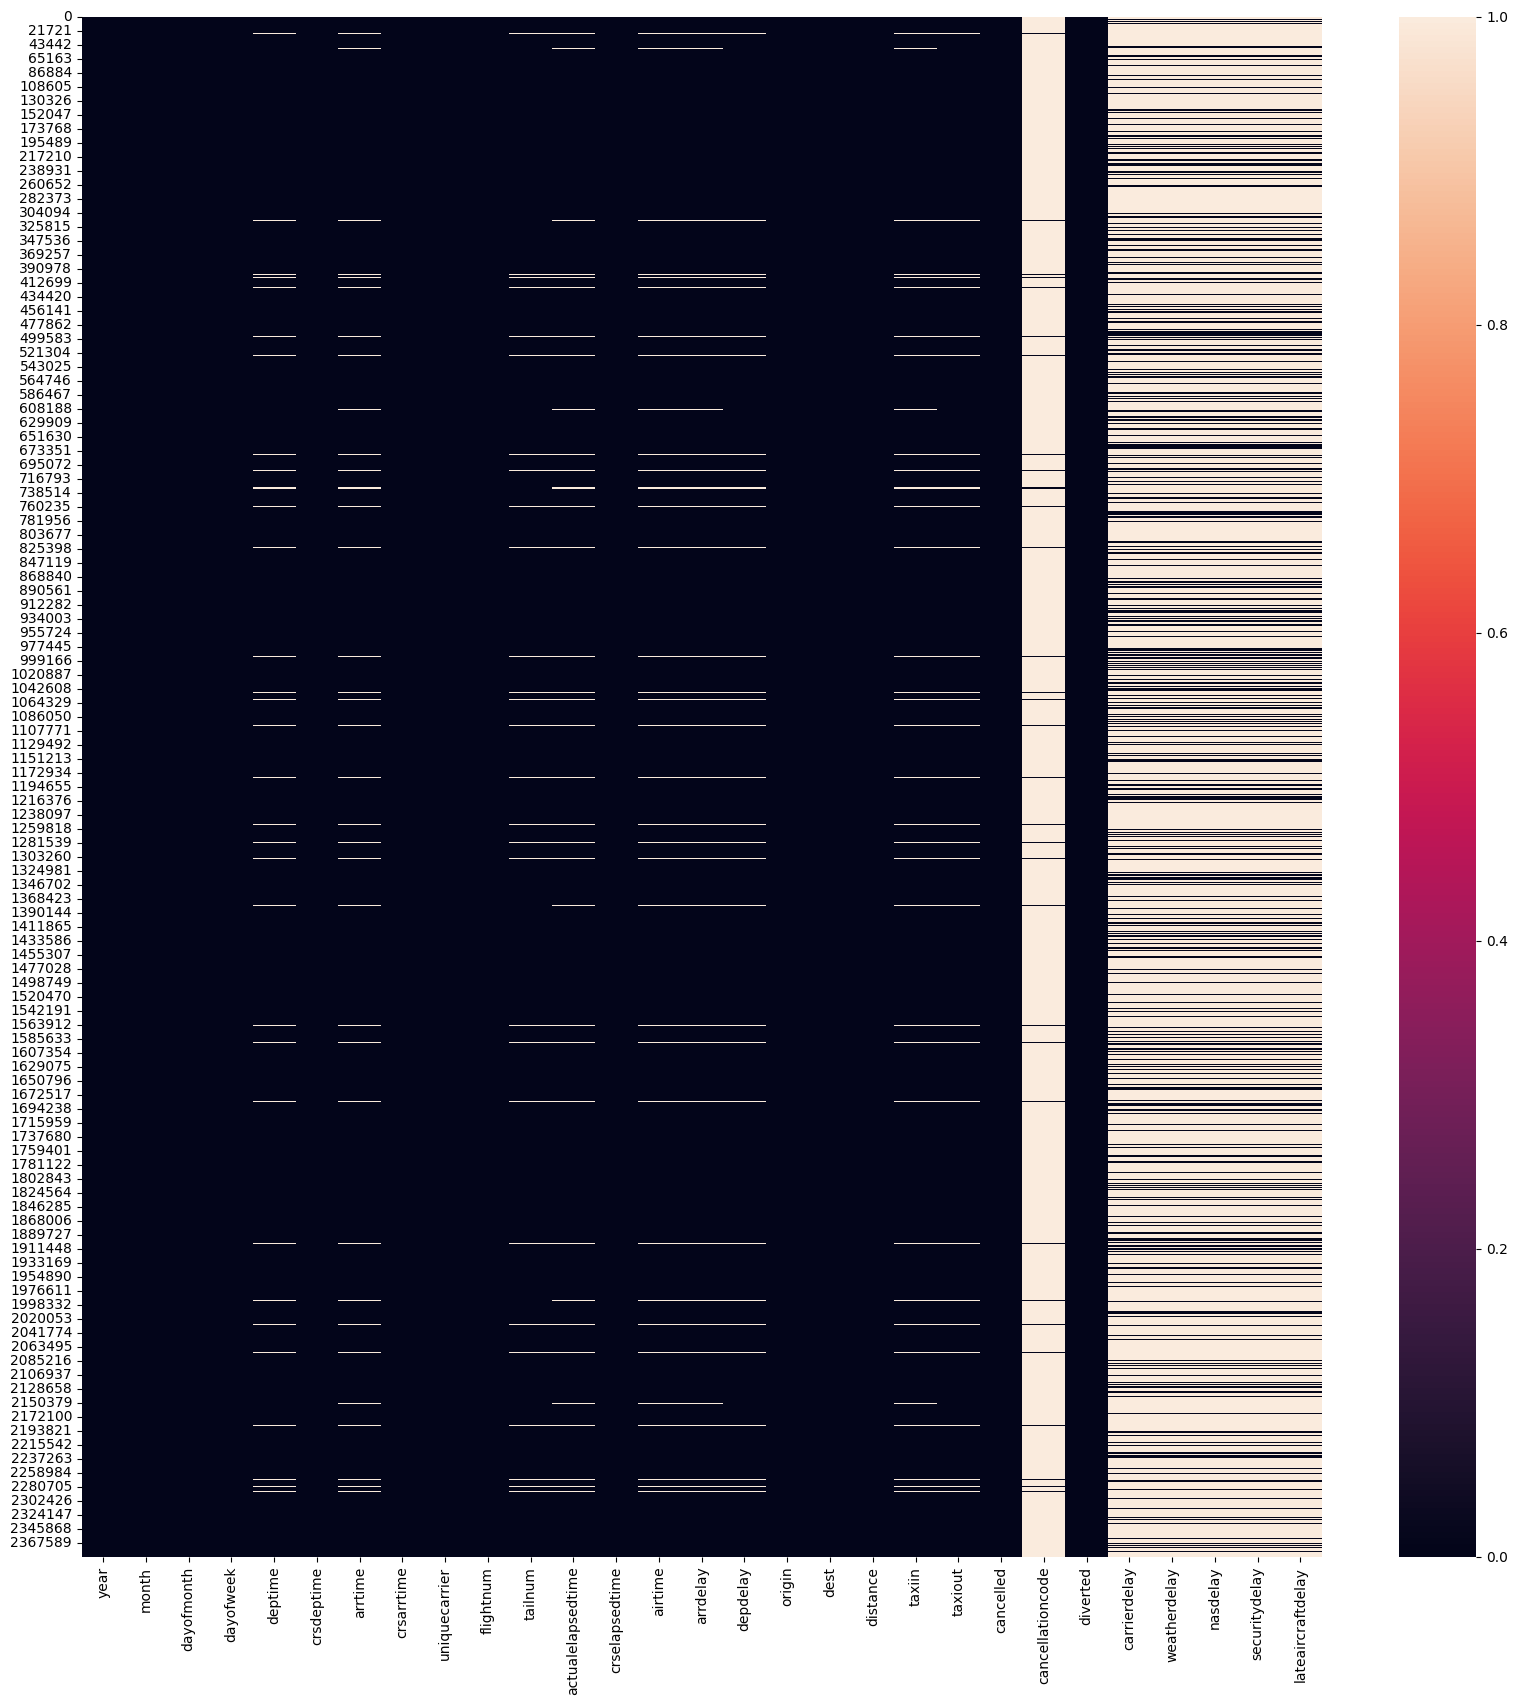

cancellationcode    0.9700
lateaircraftdelay   0.7600
securitydelay       0.7600
nasdelay            0.7600
weatherdelay        0.7600
carrierdelay        0.7600
actualelapsedtime   0.0300
taxiout             0.0300
taxiin              0.0300
depdelay            0.0300
airtime             0.0300
arrdelay            0.0300
deptime             0.0300
arrtime             0.0300
tailnum             0.0200
crselapsedtime      0.0000
cancelled           0.0000
dayofmonth          0.0000
dayofweek           0.0000
crsdeptime          0.0000
diverted            0.0000
crsarrtime          0.0000
uniquecarrier       0.0000
distance            0.0000
dest                0.0000
origin              0.0000
flightnum           0.0000
month               0.0000
year                0.0000
dtype: float64

In [9]:
'''
Missing Values
'''

# plot missing values as heatmap visualization
plt.figure(figsize=(20,20))
sns.heatmap( df.isna()) 
plt.show()

# tabular review
df.isna().mean().round(2).sort_values(ascending=False)

In [23]:
'''
Initial Shape of Dataset
'''
df_opt.shape

(2389217, 29)

In [21]:
'''
Check for Duplicate Records
'''

df_opt.duplicated().sum()

4

In [24]:
'''
Review numerical features (data type of int* or float*)
'''
df_opt.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2389217.0000,2008.0000,0.0000,2008.0000,2008.0000,2008.0000,2008.0000,2008.0000
month,2389217.0000,2.5050,1.1215,1.0000,1.0000,3.0000,4.0000,4.0000
dayofmonth,2389217.0000,15.6639,8.7504,1.0000,8.0000,16.0000,23.0000,31.0000
dayofweek,2389217.0000,3.9096,1.9804,1.0000,2.0000,4.0000,6.0000,7.0000
deptime,2324775.0000,1340.0184,480.2717,1.0000,930.0000,1330.0000,1733.0000,2400.0000
crsdeptime,2389217.0000,1329.9923,465.7833,0.0000,927.0000,1325.0000,1720.0000,2359.0000
arrtime,2319121.0000,1485.8350,508.1295,1.0000,1110.0000,1516.0000,1914.0000,2400.0000
crsarrtime,2389217.0000,1496.7440,484.5238,1.0000,1115.0000,1520.0000,1910.0000,2400.0000
flightnum,2389217.0000,2213.8880,1951.3921,1.0000,605.0000,1544.0000,3631.0000,9741.0000
actualelapsedtime,2319121.0000,NaN,NaN,14.0000,78.0000,111.0000,160.0000,905.0000


In [13]:
df.isna().mean().sort_values(ascending=False)

cancellationcode    0.9730
lateaircraftdelay   0.7553
securitydelay       0.7553
nasdelay            0.7553
weatherdelay        0.7553
carrierdelay        0.7553
actualelapsedtime   0.0293
taxiin              0.0293
airtime             0.0293
arrdelay            0.0293
arrtime             0.0293
depdelay            0.0270
deptime             0.0270
taxiout             0.0270
tailnum             0.0178
crselapsedtime      0.0002
cancelled           0.0000
dayofmonth          0.0000
dayofweek           0.0000
crsdeptime          0.0000
diverted            0.0000
crsarrtime          0.0000
flightnum           0.0000
distance            0.0000
dest                0.0000
origin              0.0000
month               0.0000
uniquecarrier       0.0000
year                0.0000
dtype: float64

In [25]:
'''
Review categorical features (data type of category)
'''
df_opt.describe( include='category' ).T

,count,unique,top,freq
uniquecarrier,2389217,20,WN,398966
tailnum,2346765,5031,N693BR,1526
origin,2389217,291,ATL,137014
dest,2389217,293,ATL,136950
cancellationcode,64442,4,A,26075


---

***💡 Insights: Data Integrity Review***
* **Missing Data**
    * _NaNs_ for `*delay` features are expected, as they only exist when the delay is in excess of 30 minutes, and can therefore be backfilled with `0.0` values.
    * _NaNs_ for `cancellationcode` is also expected (should only populate when cancelled), those will backfill with a default value, `N`.
    * Other missing values will need to be evaluated by feature for imputation or removal.
* **Numerical Features**
    * Based on varying orders of magnitude in numerical feature means, scaling of numerical features will be necessary when creating model pipelines.
    * Engineer higher order features (`PolynomialFeatures()`) to understand their predictive power within models.
* **Categorical Features**
    * According to an [Ashville Regional Airport article](https://flyavl.com/article/every-tail-tells-tale#:~:text=Every%20airplane%20has%20its%20own,is%20a%20paperwork%20intensive%20process.), `tailnum` is unique per aircraft currently in service. While less valuable to binarize (many unique values), it may be useful as a grouping feature to understand if a specific aircraft experiences more flight changes.
    * `uniquecarrier` will be binarized to determine if any airline companies are more prone to flight changes.
    * `origin` and `destination` may be considered for binarization, as it's quite possible certain airports may contribute greater than others, to flight changes.
    * `cancellationcode`, while it has expected missing values (when flight was completed as planned), the _NaN_ values will be imputed (backfill to "_N_"), and then binarized for more granular flight change understanding.
    * _Note:_ Binarization should be completed prior to bivariate analysis to understand correlations.
* **Target Feature**
    * The target feature does not exist as a column already, and thus must be engineered from other features (`cancelled`, `diverted`).

---

#### 2.4.2 Univariate Analysis
* Distribution of Categorical Features
* Distribution of Numerical Features

In [28]:
'''
Create lists for numerical and categorical feature names
'''
cols_num = df_opt.select_dtypes( exclude=[ "category" ] ).columns.tolist()
cols_cat = df_opt.select_dtypes( include=[ "category" ] ).columns.tolist()

#cols_num, cols_cat

---

***💡 Insights: Univariate Analysis***
* ---Add here---

---

#### 2.4.3 Multivariate Analysis
* Correlation Matrix (Heatmap)
* Histograms

In [ ]:
# Seaborn heatmap of dataframe correlation 
mask = np.triu(np.ones_like(df.corr(numeric_only=True).round(2)))
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), mask=mask, annot=True)

In [ ]:
df.hist(figsize=(20,20));
plt.tight_layout()


In [ ]:
# df.plot(kind="bar", figsize=(20,20), subplots=True )
# plt.tight_layout()

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">3.0 Data Preparation</h2>

* Drop duplicate records
* Resolve missing values (imputation or removal)
* Creation of new **target** feature `flight-outcome`, with the following class labels: `['on-schedule', 'cancelled', 'diverted']`
* Create dataframe with only useful features (good predictive power), either due to high multicollinearity or redundancy in definition.
* Feature engineering (Polynomial Features)
* Scale all numerical features (`int*` and `float*` data types)
* Binarize relevant categorical features (`['']`)
  

In [22]:
'''
Drop Duplicates (expecting 4 duplicate records to drop)
'''
df_prep = df_opt.drop_duplicates()

# validate 4 records were dropped
df_opt.shape[0] - df_prep.shape[0]

4

### 3.5 Feature Selection
* Subset Dataframe to only use features deemed important

<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">4.0 General Initial Models</h2>

Use multiple regression models 
* Logistic Regression
* K-Nearest Neighbors
* Decision Tree
* Support Vector Machines
* RandomForest Decision Tree
* 

Evaluate on:
* Confusion Matrix
* Model Scoring
  
### 4.1 Establish Evaluation Metric Baseline


<h2 style="text-align: center; border: 2px solid; padding: 25px 25px; color: green; font-weight: bold; font-style: italic;">4.0 Model Evaluation and Improvement</h2>

Through cross-validation techniques, identify the best hyperparameters per regression model, to improve model scoring and selection

### 4.1 Gridsearch hyperparameters